In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X= dataset.iloc[:,3:5].values
#X=dataset.iloc[:,3:4]

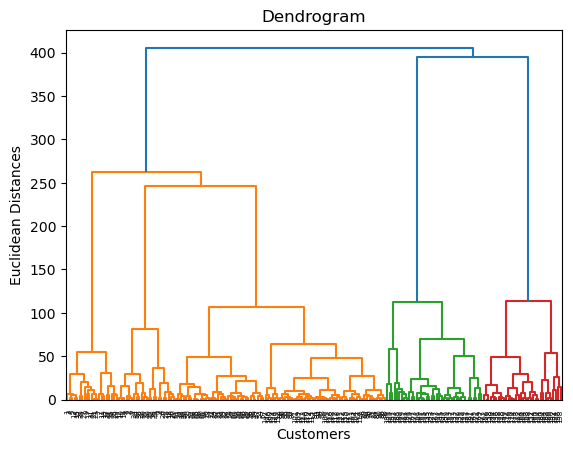

In [5]:
import scipy.cluster.hierarchy as sch
#No Eblow Methos, so using Dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
clusmodel = AgglomerativeClustering(n_clusters =5)
label = clusmodel.fit_predict(X)

In [7]:
supervised=pd.DataFrame(dataset)

In [8]:
supervised['CLuster_group']=label

In [9]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),CLuster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


C:\Anaconda\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


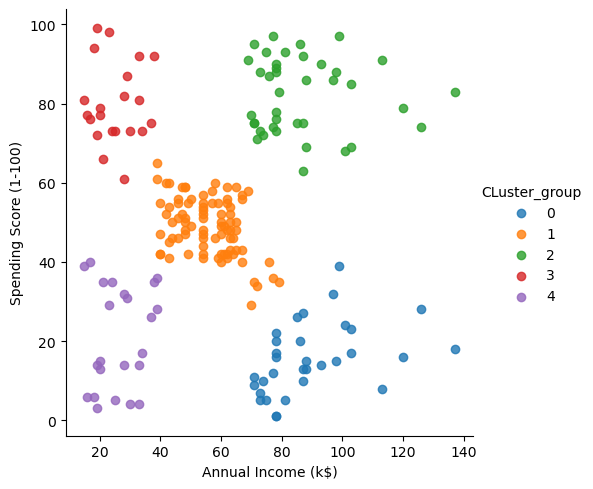

In [10]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend_out=True)

In [12]:
from sklearn import metrics
labels = clusmodel.labels_

from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels) #Output is = 0.5725628995597086
#y_kmeans

0.5782207452369452

In [13]:
metrics.calinski_harabasz_score(X, labels)


243.07142892964563

In [15]:
metrics.silhouette_score(X, label, metric='euclidean')  #Output is 0.553931997444648

0.5529945955148897